In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install catboost scikit-learn pathlib pandas numpy matplotlib seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.5 MB/s eta 0:00:00


In [48]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split as tts
from catboost import CatBoostClassifier, Pool
from catboost.text_processing import Tokenizer, Dictionary
from sklearn.metrics import f1_score
from tqdm.notebook import tqdm
from pathlib import Path

In [4]:
base_path = Path("/content/drive/MyDrive/SiriusAI")

In [5]:
data = pd.read_csv(base_path / "reviews.csv", delimiter=',')
data.head(3)

,review,rate
0,Все очень понравилось. Удобное расположение от...,5
1,"Замечательный отель, в номере идеально чисто. ...",5
2,Очень хорошая гостиница,5


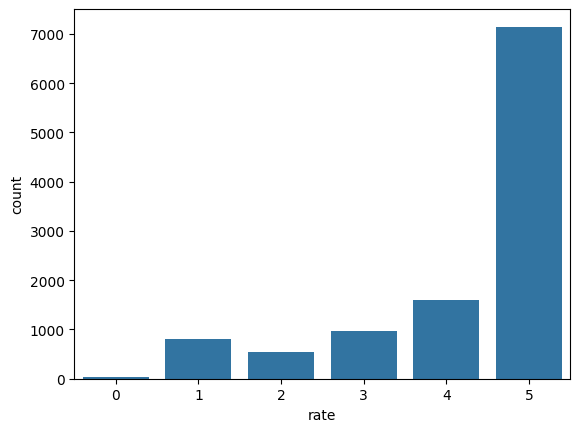

In [6]:
sb.countplot(x="rate", data=data)
plt.show()

In [7]:
model = CatBoostClassifier()
model.load_model(base_path / "model_clf_2.cbm")

In [49]:
X = data["review"].values.reshape(-1, 1)
Y = data["rate"].values.reshape(-1, 1)

x_train, x_val, y_train, y_val = tts(X, Y, random_state=1234, test_size=0.1)

legit, not_leg = [], []

for i in tqdm(range(len(y_val))):
  pool = Pool(data=x_val[i], text_features=[0])
  if model.predict(pool)[0][0] == y_val[i]:
    legit.append(model.predict(pool)[0][0])
  else:
    not_leg.append(model.predict(pool)[0][0])

  0%|          | 0/1108 [00:00<?, ?it/s]

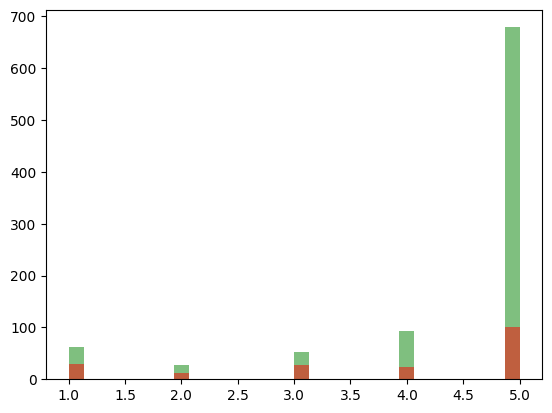

In [52]:
plt.hist(legit, bins=30, alpha=0.5, color='green')
plt.hist(not_leg, bins=30, alpha=0.5, color='red')
plt.show()

**Train**
---
Train classifier model



In [ ]:
data = pd.read_csv(base_path / "reviews.csv", delimiter=',')

X = data["review"].values.reshape(-1, 1)
Y = data["rate"].values.reshape(-1, 1)

x_train, x_val, y_train, y_val = tts(X, Y, random_state=42, test_size=0.2)

print(x_train.shape, y_train.shape)

(8858, 1) (8858, 1)


In [ ]:
train_pool = Pool(
    data=x_train,
    label=y_train,
    text_features=[0]
)
val_pool = Pool(
    data=x_val,
    label=y_val,
    text_features=[0]
)

In [ ]:
model = CatBoostClassifier(
    iterations=2000,
    depth=15,
    eval_metric="TotalF1",
    task_type="GPU",
    learning_rate=0.001,
    od_wait=7500
)

In [ ]:
model.fit(
    train_pool,
    eval_set=val_pool,
    verbose=10,
    use_best_model=True
)

0:	learn: 0.8112219	test: 0.6446244	best: 0.6446244 (0)	total: 2.42s	remaining: 1h 20m 49s
10:	learn: 0.8668513	test: 0.6965619	best: 0.7049831 (8)	total: 19s	remaining: 57m 16s
20:	learn: 0.8689772	test: 0.7002879	best: 0.7049831 (8)	total: 33.8s	remaining: 53m 4s
30:	learn: 0.8702888	test: 0.7046040	best: 0.7065048 (26)	total: 48.4s	remaining: 51m 13s
40:	learn: 0.8686469	test: 0.7017890	best: 0.7065048 (26)	total: 1m 2s	remaining: 50m 9s
50:	learn: 0.8711315	test: 0.7029284	best: 0.7065048 (26)	total: 1m 17s	remaining: 49m 38s
60:	learn: 0.8708720	test: 0.7059983	best: 0.7065048 (26)	total: 1m 32s	remaining: 48m 53s
70:	learn: 0.8710815	test: 0.7064057	best: 0.7070195 (64)	total: 1m 46s	remaining: 48m 23s
80:	learn: 0.8716554	test: 0.7050155	best: 0.7077156 (74)	total: 2m 1s	remaining: 48m
90:	learn: 0.8714791	test: 0.7041729	best: 0.7077156 (74)	total: 2m 16s	remaining: 47m 38s
100:	learn: 0.8709463	test: 0.7067411	best: 0.7079768 (97)	total: 2m 30s	remaining: 47m 12s
110:	learn: 0

In [ ]:
model.save_model(base_path / "model_clf_2.cbm")